In [ ]:
!git clone https: // github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

## 1. PCA and Clustering on 2D ferromagnetic Ising model

In [109]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [110]:
# spin configurations
df1 = pd.read_csv(
    "./PHYS3151-Machine-Learning-in-Physics-2023/principal-component-analysis/Ising_model/conf.csv", header=None)
# temperature
df2 = pd.read_csv(
    "./PHYS3151-Machine-Learning-in-Physics-2023/principal-component-analysis/Ising_model/temp.csv", header=None)
df1 = df1.to_numpy()
df2 = df2.to_numpy()
x = df1
t = df2
t = t.T


### (a) Perform PCA to the data

We project the data onto the first **three** components. And plot our dimensionally reduced data.

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pc = pca.fit_transform(x)


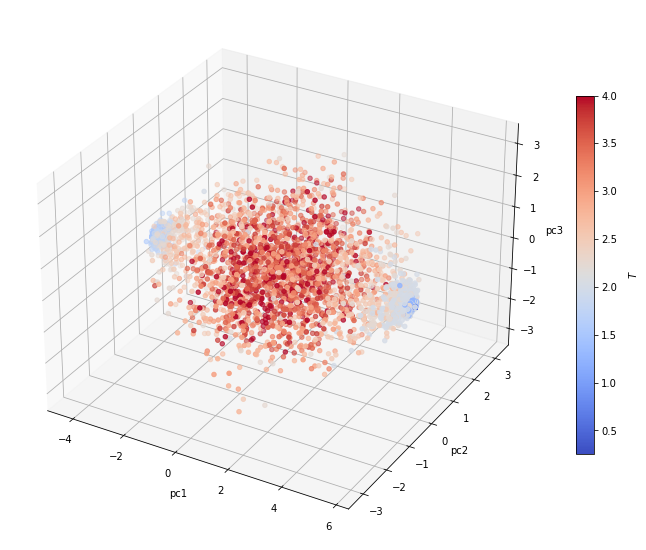

In [112]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2], c=t, cmap="coolwarm")

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
cb = fig.colorbar(p, shrink=0.55)
cb.set_label(label='$T$', labelpad=10)
plt.show()


### (b) Perform K-mean clustering 

We perform K-mean clustering with 3 centroids, and plot the resulting clusters in different colors

centers are: [[ 5.09193220e+00  4.91960238e-03 -3.46461906e-03]
 [-3.96736518e+00  3.85417956e-03  2.17027128e-03]
 [ 6.74565651e-01 -7.95906696e-03  1.33767670e-04]]


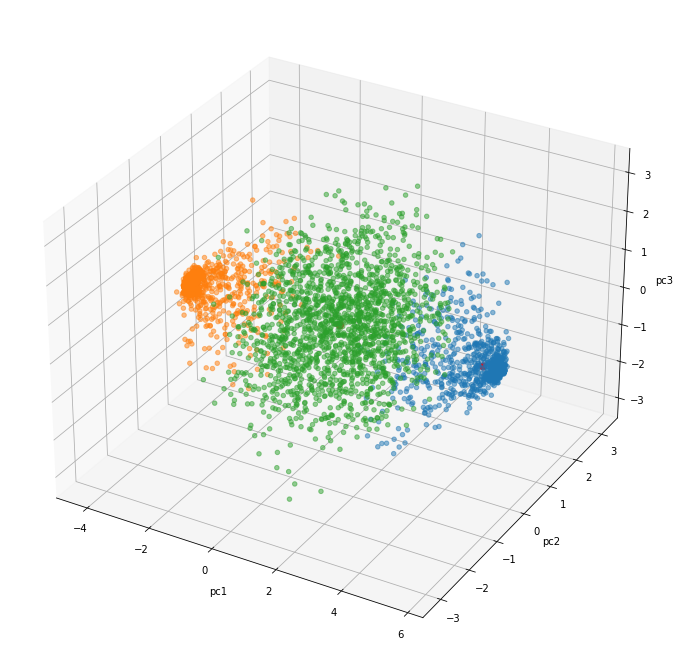

In [113]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto').fit(pc)
centroids = kmeans.cluster_centers_
print('centers are:', centroids)

pc = pd.DataFrame(pc.tolist())
pc.columns = ['pca1', 'pca2', 'pca3']
pc["Cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for k in range(3):
    data = pc[pc["Cluster"] == k]
    ax.scatter(data["pca1"], data["pca2"], data["pca3"], alpha=0.5)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=50)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()


### (c) Plot the distribution of eigenvalues

We plot the distribution of eigenvalues for the first two component as heat map on
the $ 10 \times 10 $ lattice.

In [114]:
from numpy import linalg as la

z = np.zeros(x.shape)
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0, ddof=0)
for i in range(100):
    z[:, i] = (x_mean[i]-x[:, i])

cov = np.cov(z, rowvar=False)
U, sigma, VT = la.svd(cov)


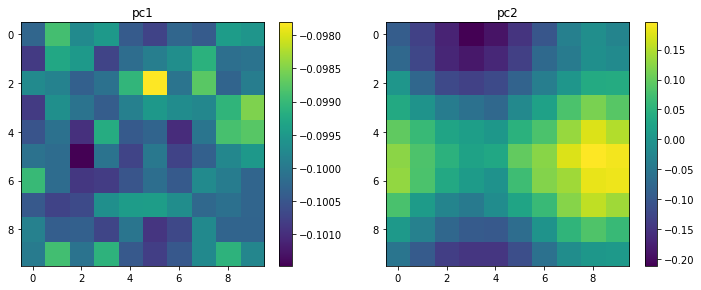

In [115]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
ax1, ax2 = axes

im1 = ax1.imshow(U[:, 0].reshape(10, 10))
im2 = ax2.imshow(U[:, 1].reshape(10, 10))

fig.colorbar(im1, ax=ax1, shrink=0.75)
fig.colorbar(im2, ax=ax2, shrink=0.75)
ax1.set_title('pc1')
ax2.set_title('pc2')
plt.show()


## 2. Theoretical aspect of 2D Ising Model

We consider Ising model in infinite size (L=6, 8, 10).

In [116]:
# spin configurations
L6 = pd.read_csv(
    "./PHYS3151-Machine-Learning-in-Physics-2023/principal-component-analysis/Ising_model/F_conf_L6.csv", header=None)
L8 = pd.read_csv(
    "./PHYS3151-Machine-Learning-in-Physics-2023/principal-component-analysis/Ising_model/F_conf_L8.csv", header=None)
L10 = pd.read_csv(
    "./PHYS3151-Machine-Learning-in-Physics-2023/principal-component-analysis/Ising_model/F_conf_L10.csv", header=None)
# temperature
t = pd.read_csv(
    "./PHYS3151-Machine-Learning-in-Physics-2023/principal-component-analysis/Ising_model/F_temp.csv", header=None)

L6 = L6.to_numpy()
L8 = L8.to_numpy()
L10 = L10.to_numpy()
t = t.to_numpy()


### (a) The magnetization of all systems at different temperatures

In [117]:
def group_avg(arr):
    # Calculate m, then group by t and take average
    m = np.c_[abs(arr.sum(axis=1)/arr.shape[1]), t]
    m = pd.DataFrame(m.tolist())
    m.columns = ['m', 't']
    m = m.groupby('t').mean().sort_values(by=['t'])
    return m


In [118]:
# Process data
arr6 = group_avg(L6)
arr8 = group_avg(L8)
arr10 = group_avg(L10)

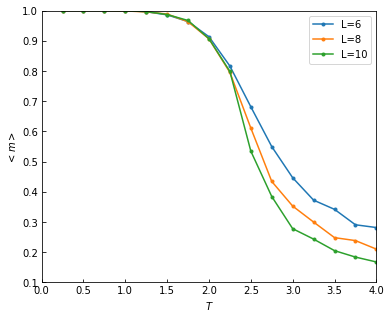

In [119]:
fig, ax = plt.subplots(figsize=(6, 5))

T = sorted(list(set(t[:, 0])))
ax.plot(T, arr6['m'], label='L=6', marker='.')
ax.plot(T, arr8['m'], label='L=8', marker='.')
ax.plot(T, arr10['m'], label='L=10', marker='.')

ax.set_xlim(0, T[-1])
ax.set_ylim(0.1, 1)
ax.set_xlabel('$T$')
ax.set_ylabel('$<m>$')
ax.tick_params(direction='in')
ax.legend()
plt.show()


### (b) Describe the trend and compare with the theoretical prediction
The plots above demonstrate that the magnetization as a function of temperature approach the theoretical prediction asymptotically as the system size increases.


<img style="width: 40%;" src="./theoretical.jpg">

